In [1]:
from sklearn.datasets import load_wine
import numpy as np

wine = load_wine()

In [2]:
wine.data.shape

(178, 13)

In [3]:
from sklearn.model_selection import train_test_split

train, test, labels_train, labels_test = train_test_split(wine.data, wine.target,
                                                          train_size=0.70, test_size=0.30,
                                                          random_state=2022)
categorical_features = np.argwhere(
    np.array([len(set(wine.data[:, x])) for x in range(wine.data.shape[1])]) <= 10).flatten()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = RandomForestClassifier(random_state=2022)
lr.fit(train, labels_train)

RandomForestClassifier(random_state=2022)

In [5]:
pred_origin = lr.predict_proba(test)
pred_origin = np.argmax(pred_origin, axis=1)

In [6]:
import sys
sys.path.append('..')
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=wine.feature_names,
                                                   categorical_features=categorical_features, verbose=False,
                                                   mode='classification', random_state=2022)

[('660.00 < proline <= 1035.00', -2.252748181960717), ('hue <= 0.80', -1.1652774649200144), ('od280/od315_of_diluted_wines <= 1.95', -1.1601937216993818), ('color_intensity > 6.20', -0.8632298392023875), ('flavanoids <= 1.25', -0.8510365270041503), ('13.00 < alcohol <= 13.67', -0.8497687387796687), ('magnesium > 107.00', -0.3619934748545562), ('nonflavanoid_phenols > 0.43', -0.2798904431091694), ('19.45 < alcalinity_of_ash <= 21.50', 0.18479532708618004), ('1.83 < malic_acid <= 2.91', 0.13489482505047645), ('total_phenols <= 1.73', -0.11514263060890216), ('2.36 < ash <= 2.57', -0.10867886431782665), ('1.23 < proanthocyanins <= 1.47', -0.0747893418762548)]
[-0.0747893418762548, -0.10867886431782665, -0.11514263060890216, 0.13489482505047645, 0.18479532708618004, -0.2798904431091694, -0.3619934748545562, -0.8497687387796687, -0.8510365270041503, -0.8632298392023875, -1.1601937216993818, -1.1652774649200144, -2.252748181960717]
['1.23 < proanthocyanins <= 1.47', '2.36 < ash <= 2.57', 'tot

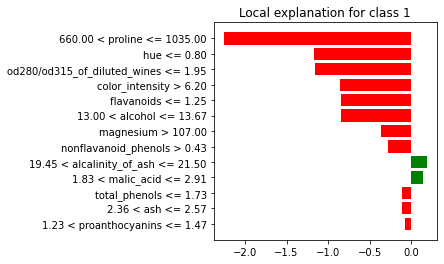

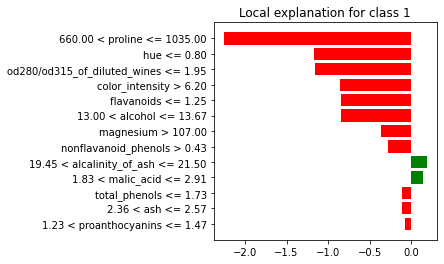

In [7]:
exp = explainer.explain_instance(test[25], lr.predict_proba, num_features=13, labels=(0, 1, 2))
exp.as_pyplot_figure(label=1)

In [8]:
import tqdm as td
pred_lime = []
for i in td.tqdm(test):
    exp = explainer.explain_instance(i, lr.predict_proba, num_features=13, labels=(0, 1, 2))
    # print(exp.local_pred)
    pred_lime.append([exp.local_pred[0].tolist()[0], exp.local_pred[1].tolist()[0], exp.local_pred[2].tolist()[0]])

100%|██████████| 54/54 [00:53<00:00,  1.01it/s]


In [9]:
pred_lime = np.argmax(pred_lime, axis=1)
pred_lime

array([0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1,
       1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 1], dtype=int64)

In [10]:
from sklearn.metrics import classification_report

print('\nClassification Report:\n', classification_report(labels_test, pred_origin, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     0.9333    0.9333    0.9333        15
           1     0.9524    0.9091    0.9302        22
           2     0.9444    1.0000    0.9714        17

    accuracy                         0.9444        54
   macro avg     0.9434    0.9475    0.9450        54
weighted avg     0.9446    0.9444    0.9441        54



In [11]:
print('\nClassification Report:\n', classification_report(labels_test, pred_lime, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     0.9375    1.0000    0.9677        15
           1     0.9524    0.9091    0.9302        22
           2     0.9412    0.9412    0.9412        17

    accuracy                         0.9444        54
   macro avg     0.9437    0.9501    0.9464        54
weighted avg     0.9447    0.9444    0.9441        54



In [12]:
print('\nClassification Report:\n', classification_report(pred_origin, pred_lime, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     0.9375    1.0000    0.9677        15
           1     0.9524    0.9524    0.9524        21
           2     1.0000    0.9444    0.9714        18

    accuracy                         0.9630        54
   macro avg     0.9633    0.9656    0.9639        54
weighted avg     0.9641    0.9630    0.9630        54

